In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

np.random.seed(8)
X = np.random.randn(1000,1)
y = 2*(X**3) + 10 + 4.6*np.random.randn(1000,1)

In [ ]:
# Weight Matrix in code. It is a diagonal matrix.def wm(point, X, tau): 
def wm(point, X, tau):
  # tau --> bandwidth
  # X --> Training data.
  # point --> the x where we want to make the prediction.
    
  # m is the No of training examples .
    m = X.shape[0] 
    
  # Initialising W as an identity matrix.
    w = np.mat(np.eye(m)) 
    
  # Calculating weights for all training examples [x(i)'s].
    for i in range(m): 
        xi = X[i] 
        d = (-2 * tau * tau) 
        w[i, i] = np.exp(np.dot((xi-point), (xi-point).T)/d) 
        
    return w

In [ ]:
def predict(X, y, point, tau): 
    
   # m = number of training examples. 
    m = X.shape[0] 
    
   # Appending a cloumn of ones in X to add the bias term.
## # Just one parameter: theta, that's why adding a column of ones        #### to X and also adding a 1 for the point where we want to          #### predict. 
    X_ = np.append(X, np.ones(m).reshape(m,1), axis=1) 
    
   # point is the x where we want to make the prediction. 
    point_ = np.array([point, 1]) 
    
   # Calculating the weight matrix using the wm function we wrote      #  # earlier. 
    w = wm(point_, X_, tau) 
    
  # Calculating parameter theta using the formula.
    theta = np.linalg.pinv(X_.T*(w * X_))*(X_.T*(w * y)) 
    
  # Calculating predictions.  
    pred = np.dot(point_, theta) 
    
   # Returning the theta and predictions 
    return theta, pred

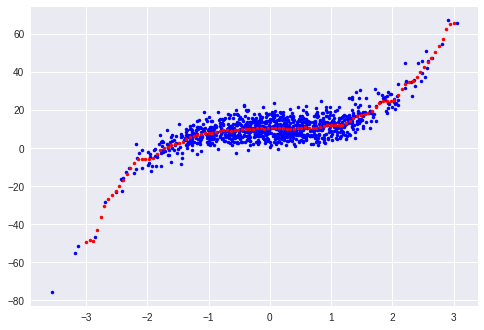

In [ ]:
def plot_predictions(X, y, tau, nval):   # X --> Training data. 
   # y --> Output sequence.
   # nval --> number of values/points for which we are going to
   # predict.   
   # tau --> the bandwidth.     
   # The values for which we are going to predict.
   # X_test includes nval evenly spaced values in the domain of X.
    X_test = np.linspace(-3, 3, nval) 
    
   # Empty list for storing predictions. 
    preds = [] 
    
   # Predicting for all nval values and storing them in preds. 
    for point in X_test: 
        theta, pred = predict(X, y, point, tau) 
        preds.append(pred)
        
   # Reshaping X_test and preds
    X_test = np.array(X_test).reshape(nval,1)
    preds = np.array(preds).reshape(nval,1)
    
   # Plotting 
    plt.plot(X, y, 'b.')
    plt.plot(X_test, preds, 'r.') # Predictions in red color.
    plt.show()
plot_predictions(X, y, 0.08, 100)

In [ ]:
#https://towardsdatascience.com/locally-weighted-linear-regression-in-python-3d324108efbf